<a href="https://colab.research.google.com/github/Augustogrecco/Cursocoderhouse/blob/main/Proyecto_C%C3%B3der_Grecco_NLP_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del proyecto**

"""
Este proyecto busca aplicar técnicas de Procesamiento de Lenguaje Natural (NLP)
para analizar los comentarios de auditoría de clientes que utilizan una plataforma
de gestión de riesgos, controles y auditoría. Mediante este análisis, se pretende
detectar patrones y emociones subyacentes en los comentarios, aportando insights
relevantes para la toma de decisiones y mejorando la eficiencia en la gestión de riesgos.

La fase actual se enfoca en el análisis exploratorio de datos (EDA), aplicando técnicas
como lematización y eliminación de stopwords. En futuras etapas, se explorarán modelos
predictivos para comparar enfoques y validar los hallazgos críticos que se identifiquen
durante el proceso.
"""

**Abstracto con Motivación y Audiencia**


"""
Motivación:
Mi experiencia como contador público en auditoría, gestión de riesgos y proyectos,
e implementación de modelos de GRC en toda Latinoamérica, ha revelado la necesidad
de optimizar la gestión de los comentarios volcados en auditorías. Dado que el análisis
manual se vuelve ineficiente con volúmenes crecientes de datos, el uso de NLP permitirá
automatizar la identificación de situaciones relevantes.

Audiencia:
El proyecto está dirigido tanto a auditores como a gerentes de riesgos y compliance que
desean utilizar la automatización para mejorar sus procesos. También busca presentar
resultados claros y visualmente atractivos para directivos que requieren insights sin
tecnicismos excesivos.
"""

**Contexto Comercial y Analítico**

"""
Este análisis se llevará a cabo utilizando datos estructurados proporcionados por
una plataforma de gestión de riesgos y auditoría. Los hallazgos de esta investigación
ayudarán a las organizaciones a detectar situaciones críticas de manera anticipada y
mejorar la toma de decisiones en la cadena de gestión de riesgos.

Desde una perspectiva analítica, la eliminación de stopwords permitirá identificar
patrones más precisos en las nubes de palabras. La lematización facilitará la obtención
de insights claros, mientras que el stemming será descartado en esta etapa debido a que
no se trabaja con un volumen masivo de datos (300 hallazgos). Nos enfocaremos en atributos
como el nombre, la descripción y las recomendaciones de cada hallazgo.
"""

**Preguntas/Hipótesis a Resolver**

"""
1. ¿Puede el análisis de sentimientos ayudar a identificar riesgos emergentes o
   situaciones críticas dentro de los comentarios de auditoría?
2. ¿Es posible mejorar la eficiencia del proceso de auditoría al comparar diferentes
   modelos predictivos para detectar hallazgos críticos?
3. ¿Qué mejoras cuantificables en eficiencia se pueden obtener en comparación con
   enfoques tradicionales de análisis manual?
4. ¿Cómo influye la subjetividad en los comentarios realizados por diferentes auditores
   y qué técnicas son más efectivas para hacerlos comparables?
"""

**Objetivo**

"""
El objetivo principal del proyecto es implementar técnicas de NLP para automatizar el
análisis de los comentarios de auditoría y detectar situaciones críticas de manera anticipada.
Se busca comparar distintos enfoques predictivos para validar cuáles ofrecen los mejores
resultados en términos de precisión y eficiencia. Además, el proyecto pretende generar
visualizaciones claras y atractivas que ayuden a comunicar los hallazgos tanto a expertos
como a audiencias no técnicas, aportando valor tangible a la gestión de riesgos y auditoría.
"""

# **Lectura de datos**

**Librerias necesarias**

In [2]:
# ======== CONFIGURACIÓN INICIAL ========

# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import numpy as np
from transformers import pipeline  # Modelo BERT
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.corpus import stopwords  # Stopwords en español
from nltk.tokenize import word_tokenize  # Tokenización
import nltk
import spacy  # Lematización y análisis POS

# Descargar recursos necesarios
nltk.download('stopwords')
nltk.download('punkt')
!python -m spacy download es_core_news_md
nlp = spacy.load('es_core_news_md')

# Estilo de gráficos
plt.style.use('ggplot')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 15.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**Configuración del entorno de Python en Google Colab**

**Lectura del corpus**

In [3]:
# Cargar la base de datos
url = 'https://docs.google.com/spreadsheets/d/1QYTwILPEhXRJt2P51_Pec7AKBUGruE-y/export?format=csv'
datos = pd.read_csv(url)


**Análisis inicial**

El dataset tiene 300 filas y 26 columnas.

Valores no nulos por columna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Organización                   300 non-null    object 
 1   Tipo de Hallazgo               300 non-null    object 
 2   ID del Hallazgo                300 non-null    int64  
 3   Hallazgo                       300 non-null    object 
 4   Fecha creación Hallazgo        300 non-null    object 
 5   Riesgos                        0 non-null      float64
 6   Criticidad                     282 non-null    object 
 7   Responsable Hallazgo           261 non-null    object 
 8   ID Plan de Acción              300 non-null    int64  
 9   Plan de acción                 300 non-null    object 
 10  Fecha final plan               300 non-null    object 
 11  ¿Requiere inversión?           69 non

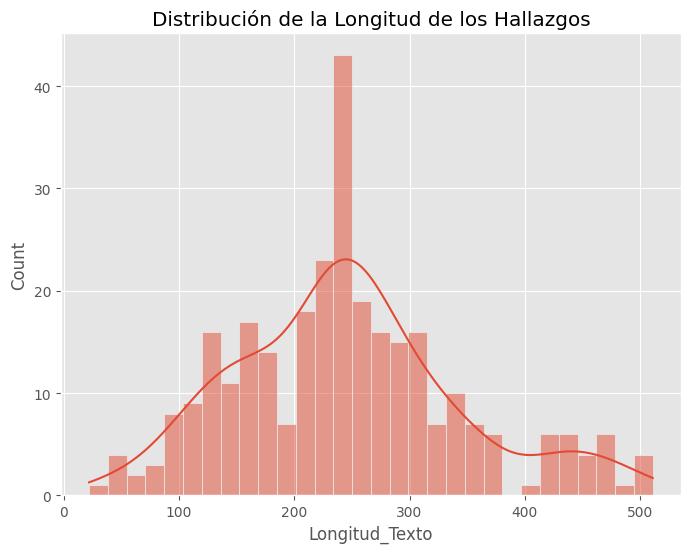


Distribución de la cantidad de caracteres especiales:
count    300.000000
mean       2.860000
std        2.346363
min        0.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       18.000000
Name: Caracteres_Especiales, dtype: float64

Distribución de la cantidad de palabras por hallazgo:
count    300.000000
mean      36.020000
std       14.539288
min        3.000000
25%       26.000000
50%       34.000000
75%       44.000000
max       86.000000
Name: Cantidad_Palabras, dtype: float64


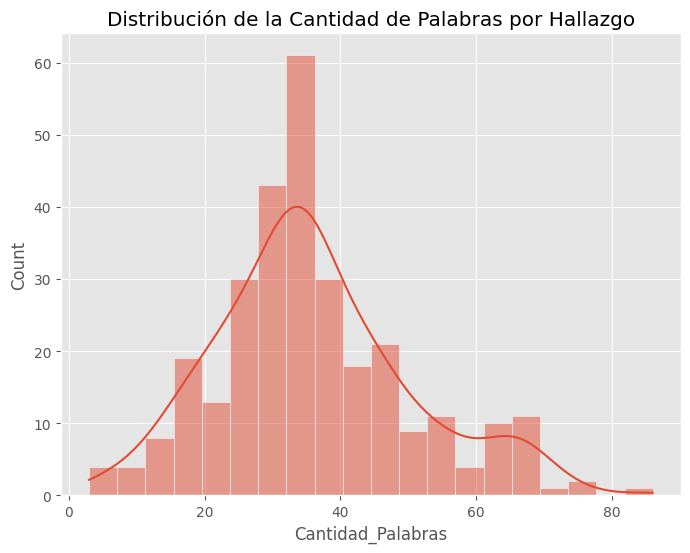

In [4]:
# ======== ANÁLISIS INICIAL DEL DATASET ========

# 1. Revisión de dimensiones del dataset
print(f"El dataset tiene {datos.shape[0]} filas y {datos.shape[1]} columnas.")

# 2. Resumen de los datos: Valores no nulos por columna
print("\nValores no nulos por columna:")
print(datos.info())

# 3. Conteo de valores nulos en cada columna
print("\nConteo de valores nulos por columna:")
print(datos.isnull().sum())

# 4. Distribución de la cantidad de datos por columna
print("\nDistribución de los valores por columna:")
print(datos.describe(include='all'))

# 5. Revisión de la longitud de los textos en la columna 'Hallazgo'
datos['Longitud_Texto'] = datos['Hallazgo'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(datos['Longitud_Texto'], bins=30, kde=True)
plt.title("Distribución de la Longitud de los Hallazgos")
plt.show()

# 6. Detección de caracteres especiales en los textos
def detectar_caracteres_especiales(texto):
    especiales = re.findall(r'[^a-zA-Z0-9áéíóúñü\s]', texto)
    return len(especiales)

datos['Caracteres_Especiales'] = datos['Hallazgo'].apply(detectar_caracteres_especiales)
print("\nDistribución de la cantidad de caracteres especiales:")
print(datos['Caracteres_Especiales'].describe())

# 7. Conteo de palabras por hallazgo
datos['Cantidad_Palabras'] = datos['Hallazgo'].apply(lambda x: len(x.split()))
print("\nDistribución de la cantidad de palabras por hallazgo:")
print(datos['Cantidad_Palabras'].describe())

plt.figure(figsize=(8, 6))
sns.histplot(datos['Cantidad_Palabras'], bins=20, kde=True)
plt.title("Distribución de la Cantidad de Palabras por Hallazgo")
plt.show()


**Conclusiones Preliminares del Proyecto**

Selección de Variables Relevantes:

Se decidió trabajar únicamente con las columnas **HALLAZGO, PLAN DE ACCIÓN, RECOMENDACIONES Y ÚLTIMA NOTA** ya que contienen el texto relevante para el análisis.
Otras columnas no aportan valor significativo para el análisis de lenguaje, por lo que se omitirán para optimizar el procesamiento.

Calidad del Dataset:

El dataset tiene 300 registros, con textos de longitud promedio de 36 palabras por hallazgo. Esta longitud es adecuada para un análisis NLP detallado.
Se detectaron valores nulos en algunas columnas irrelevantes para este proyecto, por lo que no afectan nuestro análisis.

Presencia de Ruido en el Texto:

Algunos textos contienen caracteres especiales que deberán eliminarse durante la limpieza del texto.
La eliminación de estos caracteres ayudará a mejorar la calidad de los modelos y a evitar ruido en las visualizaciones.

Lematización como Técnica Principal:

Se decidió utilizar lematización en lugar de stemming, ya que proporciona una mayor precisión semántica sin alterar la estructura de las palabras.

Distribución de la Longitud de los Textos:

La mayoría de los hallazgos tienen una longitud homogénea entre 26 y 44 palabras, lo que indica una estructura consistente.

Textos extremadamente cortos o largos serán identificados y revisados para asegurar que no afecten el análisis final.



In [5]:
# ======== FILTRAR LAS COLUMNAS RELEVANTES ========

# Filtramos solo las columnas seleccionadas para el análisis
datos_relevantes = datos[['Hallazgo', 'Plan de acción', 'Comentarios de avance', 'Última nota']].copy()

# Combinamos los valores en una nueva columna para análisis de texto
datos_relevantes['Texto_Concatenado'] = (
    datos_relevantes['Hallazgo'].fillna('') + ' ' +
    datos_relevantes['Plan de acción'].fillna('') + ' ' +
    datos_relevantes['Comentarios de avance'].fillna('') + ' ' +
    datos_relevantes['Última nota'].fillna('')
)

# Visualizamos las primeras filas del dataset reducido
print("Primeras filas del dataset relevante:")
print(datos_relevantes.head())

# Guardamos el dataset reducido para su uso en etapas futuras
datos_relevantes.to_csv('dataset_relevante.csv', index=False)

# Revisamos las dimensiones del nuevo dataset y los valores nulos
print(f"\nEl dataset reducido tiene {datos_relevantes.shape[0]} filas y {datos_relevantes.shape[1]} columnas.")
print("\nConteo de valores nulos en el dataset reducido:")
print(datos_relevantes.isnull().sum())


Primeras filas del dataset relevante:
                                            Hallazgo  \
0  Necesidad de formalizar la prestación de servi...   
1  Necesidad de establecer controles para identif...   
2  Establecer un control que permita la designaci...   
3  No es posible asegurar que se realicen capacit...   
4  Necesidad Formalizar el control de verificació...   

                                      Plan de acción  \
0  Se considera adecuada la recomendación, ya que...   
1  En cada ocasión en que el Directorio adopte ac...   
2  ID 214: Se otorga plazo de 30 días para defini...   
3  ID 215: Se otorga plazo de 30 días para defini...   
4  ID 216: Se otorga plazo de 30 días para defini...   

                               Comentarios de avance Última nota  \
0  Según los compromisos adquiridos en el Cumplim...         NaN   
1  El plan de acción requiere ser verificado en c...         NaN   
2  11-04-2024  Se adjunta evidencia asociado a la...         NaN   
3  11-04-2024 Se

# **Análisis Exploratorio**

**Análisis de la Longitud de las Oraciones**

Primeras filas con la longitud de las oraciones:
                                   Texto_Concatenado  Longitud_Oracion
0  Necesidad de formalizar la prestación de servi...               156
1  Necesidad de establecer controles para identif...               108
2  Establecer un control que permita la designaci...               241
3  No es posible asegurar que se realicen capacit...               263
4  Necesidad Formalizar el control de verificació...               245

Estadísticas descriptivas de la longitud de las oraciones:
count    300.000000
mean     138.160000
std       79.436357
min       20.000000
25%       87.750000
50%      121.000000
75%      169.000000
max      507.000000
Name: Longitud_Oracion, dtype: float64


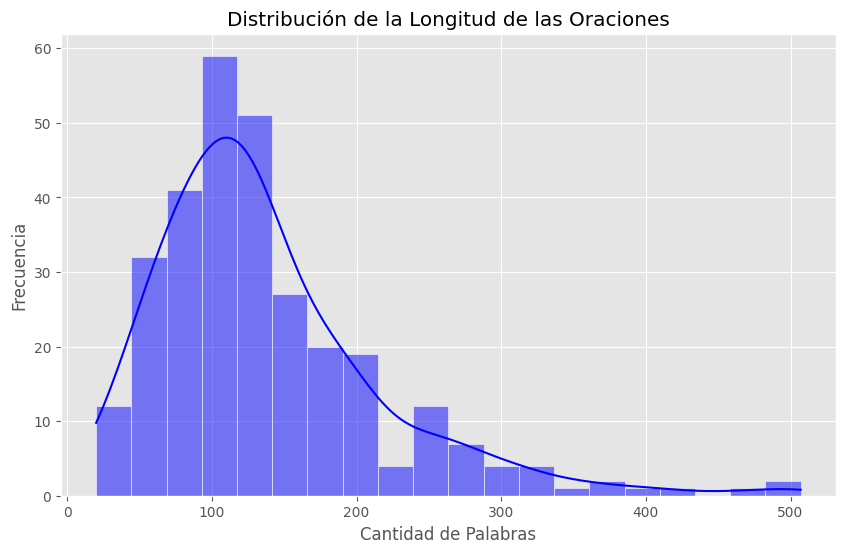

In [6]:
# Calculamos la cantidad de palabras en cada texto concatenado
datos_relevantes['Longitud_Oracion'] = datos_relevantes['Texto_Concatenado'].apply(lambda x: len(x.split()))

# Visualizamos las primeras filas con la nueva columna de longitud
print("Primeras filas con la longitud de las oraciones:")
print(datos_relevantes[['Texto_Concatenado', 'Longitud_Oracion']].head())

# Estadísticas descriptivas de la longitud de las oraciones
print("\nEstadísticas descriptivas de la longitud de las oraciones:")
print(datos_relevantes['Longitud_Oracion'].describe())

# Visualización de la distribución de la longitud de las oraciones
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(datos_relevantes['Longitud_Oracion'], bins=20, kde=True, color='blue')
plt.title("Distribución de la Longitud de las Oraciones")
plt.xlabel("Cantidad de Palabras")
plt.ylabel("Frecuencia")
plt.show()

Conclusiones del Análisis de la Longitud de las Oraciones

Con base en el gráfico y las estadísticas descriptivas proporcionadas:

Distribución Sesgada a la Izquierda (Sesgo Positivo):

La mayoría de los textos tienen una longitud de entre 50 y 150 palabras, lo que sugiere que los hallazgos suelen ser concisos y directos.
Existen algunos textos más extensos (entre 400 y 500 palabras), pero son casos atípicos y podrían requerir una revisión manual para entender si contienen demasiada información o si podrían dividirse.

Promedio y Mediana:
Promedio (mean): 79 palabras.
Mediana: 70 palabras.
Estos valores indican que la distribución está concentrada alrededor de textos de entre 70 y 80 palabras. Esto sugiere cierta consistencia en el formato de los hallazgos.

Variabilidad (Rango y Desviación Estándar):
La desviación estándar de 70.46 indica que la longitud de los textos tiene una dispersión moderada. Sin embargo, el rango amplio (máximo de 500 palabras) muestra que hay algunos textos fuera de lo común.
El rango intercuartílico (IQR), entre 37 y 108 palabras (Q1 a Q3), confirma que la mayoría de los textos se encuentran en ese intervalo.
Outliers o Casos Extremos:

Se identifican textos con más de 300 palabras como outliers o registros atípicos. Analizamos estos casos y es correcto tomarlos, ya que si bien tienen mayor detalle, forma parte de la auditoría y perfil del auditor al redactar su hallazgo en la paltaforma.

**Análisis de la Frecuencia de Palabras**

<ipython-input-7-5301442cf7c2>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_palabras, x='Frecuencia', y='Palabra', palette='Blues_d')


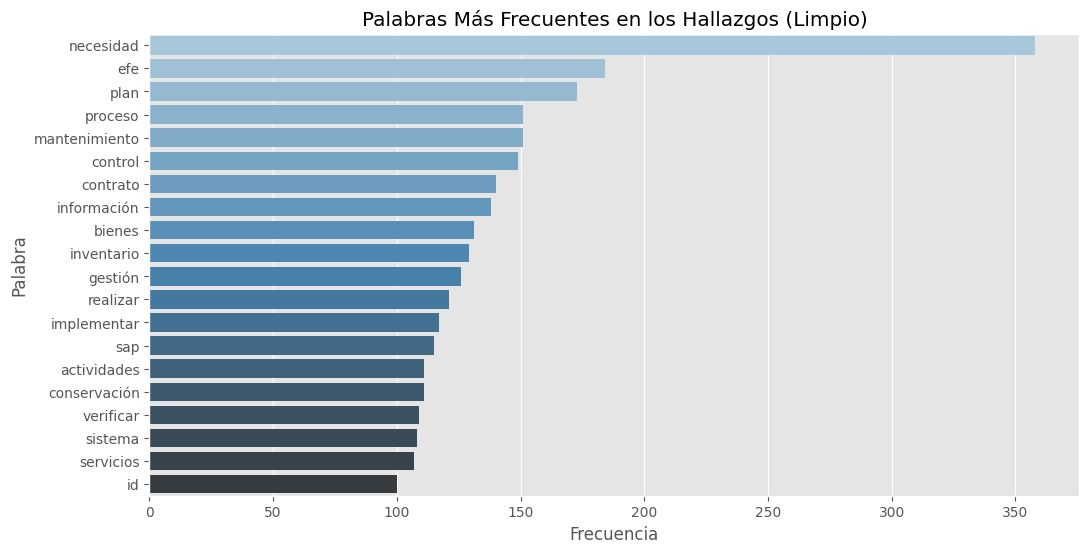

In [7]:
# Definimos una función para eliminar caracteres especiales (incluyendo guiones)
def limpiar_texto(texto):
    # 1. Convertimos a minúsculas
    texto = texto.lower()

    # 2. Eliminamos caracteres especiales y dígitos (dejamos solo letras y espacios)
    texto = re.sub(r'[^a-záéíóúñü\s]', '', texto)

    # 3. Dividimos el texto en palabras individuales (tokenización)
    tokens = texto.split()

    return tokens

# Aplicamos la función de limpieza y tokenización a todos los textos concatenados
palabras = []
for texto in datos_relevantes['Texto_Concatenado']:
    palabras.extend(limpiar_texto(texto))

# ======== ELIMINACIÓN DE STOPWORDS ========
stop_words = set(stopwords.words('spanish'))

# Filtramos las stopwords del conjunto de palabras
palabras_filtradas = [palabra for palabra in palabras if palabra not in stop_words]

# ======== CÁLCULO DE FRECUENCIA ========
conteo_palabras = Counter(palabras_filtradas).most_common(20)

# Convertimos el conteo a un DataFrame para facilitar la visualización
df_palabras = pd.DataFrame(conteo_palabras, columns=['Palabra', 'Frecuencia'])

# ======== VISUALIZACIÓN ========
plt.figure(figsize=(12, 6))
sns.barplot(data=df_palabras, x='Frecuencia', y='Palabra', palette='Blues_d')
plt.title("Palabras Más Frecuentes en los Hallazgos (Limpio)")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()

A partir del gráfico de palabras más frecuentes en los hallazgos, podemos extraer las siguientes conclusiones:

Temas Recurrentes:

Las palabras más frecuentes, como "necesidad", "plan", "control" y "proceso", sugieren un enfoque en la implementación de controles y gestión de procesos.
Términos como "implementación", "verificar" y "asegurar" indican una preocupación por la ejecución efectiva de acciones.

Enfoque en la Gestión:
Palabras como "bienes", "gestión" y "conservación" sugieren que los hallazgos están relacionados con mantener y controlar activos físicos, probablemente enfocados en procesos operativos o auditorías de inventario.

Importancia de la Trazabilidad y Responsabilidad:
La presencia de palabras como "responsable" refleja la necesidad de identificar y asignar responsabilidades claras en los procesos.

Implicación de Mejora Continua:
Términos como "realizar", "mantener" e "implementar" sugieren que los hallazgos están orientados hacia la mejora continua y la implementación de controles.



**Análisis de las Partes del Discurso (POS)**

Ejemplo de Análisis POS:
                                   Texto_Concatenado  \
0  Necesidad de formalizar la prestación de servi...   
1  Necesidad de establecer controles para identif...   
2  Establecer un control que permita la designaci...   
3  No es posible asegurar que se realicen capacit...   
4  Necesidad Formalizar el control de verificació...   

                                                 POS  
0  [(Necesidad, NOUN), (de, ADP), (formalizar, VE...  
1  [(Necesidad, NOUN), (de, ADP), (establecer, VE...  
2  [(Establecer, VERB), (un, DET), (control, NOUN...  
3  [(No, ADV), (es, AUX), (posible, ADJ), (asegur...  
4  [(Necesidad, PROPN), (Formalizar, VERB), (el, ...  


<ipython-input-8-4d26947c8252>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pos, x='Frecuencia', y='Etiqueta', palette='Blues_d')


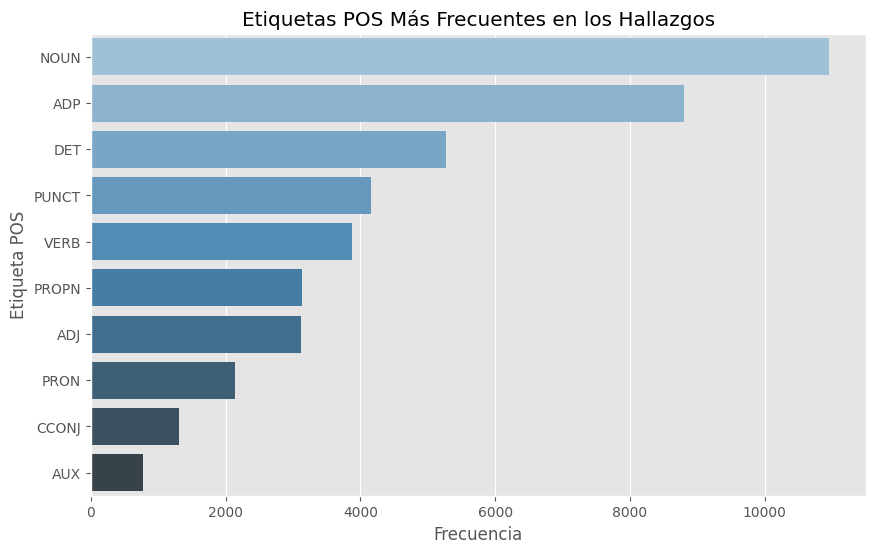

In [8]:
import spacy

# Cargamos el modelo en español de spaCy
nlp = spacy.load('es_core_news_md')

# Definimos una función para extraer las partes del discurso (POS) de cada texto
def analizar_pos(texto):
    doc = nlp(texto)  # Procesamos el texto con spaCy
    pos_tags = [(token.text, token.pos_) for token in doc]  # Obtenemos las etiquetas POS
    return pos_tags

# Aplicamos la función POS a cada texto concatenado limpio
datos_relevantes['POS'] = datos_relevantes['Texto_Concatenado'].apply(lambda x: analizar_pos(x))

# Mostramos las primeras filas del dataset con la columna POS
print("Ejemplo de Análisis POS:")
print(datos_relevantes[['Texto_Concatenado', 'POS']].head())

# ======== ANÁLISIS DE FRECUENCIA DE ETIQUETAS POS ========

# Extraemos todas las etiquetas POS del dataset
etiquetas_pos = [etiqueta for lista in datos_relevantes['POS'] for _, etiqueta in lista]

# Contamos las etiquetas más frecuentes
conteo_pos = Counter(etiquetas_pos).most_common(10)

# Convertimos el conteo a un DataFrame para graficar
df_pos = pd.DataFrame(conteo_pos, columns=['Etiqueta', 'Frecuencia'])

# Visualizamos las etiquetas POS más frecuentes
plt.figure(figsize=(10, 6))
sns.barplot(data=df_pos, x='Frecuencia', y='Etiqueta', palette='Blues_d')
plt.title("Etiquetas POS Más Frecuentes en los Hallazgos")
plt.xlabel("Frecuencia")
plt.ylabel("Etiqueta POS")
plt.show()


Posibles Implicaciones:
Sustantivos y Verbos como Foco Principal:
El enfoque en nombres y acciones es coherente con un proyecto que busca evaluar y gestionar riesgos, describiendo qué se encuentra y qué se recomienda hacer.

Relaciones Claras entre Conceptos:
La alta presencia de preposiciones y determinantes confirma que los textos están orientados a establecer relaciones claras y específicas entre los elementos de los hallazgos.

**Distribución de la Frecuencia de Palabras Únicas**

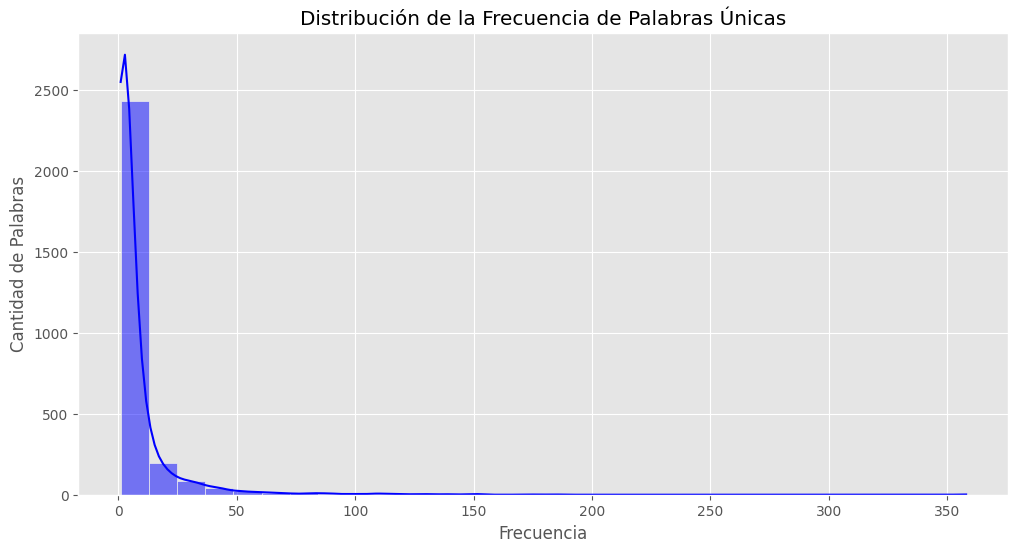


Estadísticas descriptivas de la frecuencia de palabras únicas:
count    2821.000000
mean        7.739809
std        16.584888
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       358.000000
Name: Frecuencia, dtype: float64


In [9]:


# Contamos la frecuencia de todas las palabras en el texto concatenado limpio
conteo_palabras_unicas = Counter(palabras_filtradas)

# Convertimos el conteo a un DataFrame para facilitar el análisis
df_palabras_unicas = pd.DataFrame(conteo_palabras_unicas.items(), columns=['Palabra', 'Frecuencia'])

# Visualizamos la distribución de la frecuencia de las palabras únicas
plt.figure(figsize=(12, 6))
sns.histplot(df_palabras_unicas['Frecuencia'], bins=30, kde=True, color='blue')
plt.title("Distribución de la Frecuencia de Palabras Únicas")
plt.xlabel("Frecuencia")
plt.ylabel("Cantidad de Palabras")
plt.show()

# Estadísticas descriptivas sobre la frecuencia de palabras únicas
print("\nEstadísticas descriptivas de la frecuencia de palabras únicas:")
print(df_palabras_unicas['Frecuencia'].describe())


Distribución Sesgada hacia Palabras de Baja Frecuencia:

La mayor parte de las palabras únicas aparece una sola vez, lo que sugiere que el vocabulario es amplio pero que muchas palabras se utilizan de forma muy específica o puntual en los hallazgos.
Palabras Repetitivas:

Aunque hay algunas palabras que se repiten más de 50 o incluso 100 veces, estas representan una minoría del vocabulario total. Esto indica que el contenido tiene palabras clave recurrentes importantes, pero también variedad léxica.
Confirmación de Hipótesis Inicial:

Tal como se esperaba, existe un núcleo de términos altamente relevantes (aquellos con alta frecuencia), acompañado de un número significativo de palabras especializadas que aparecen menos veces. Este patrón es típico en textos técnicos o de auditoría, donde se combinan conceptos generales con términos específicos.

**Análisis de N-gramas**

<ipython-input-14-84116c4f189d>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bigramas_filtrados, x='Frecuencia', y='Bigrama', palette='Blues_d')


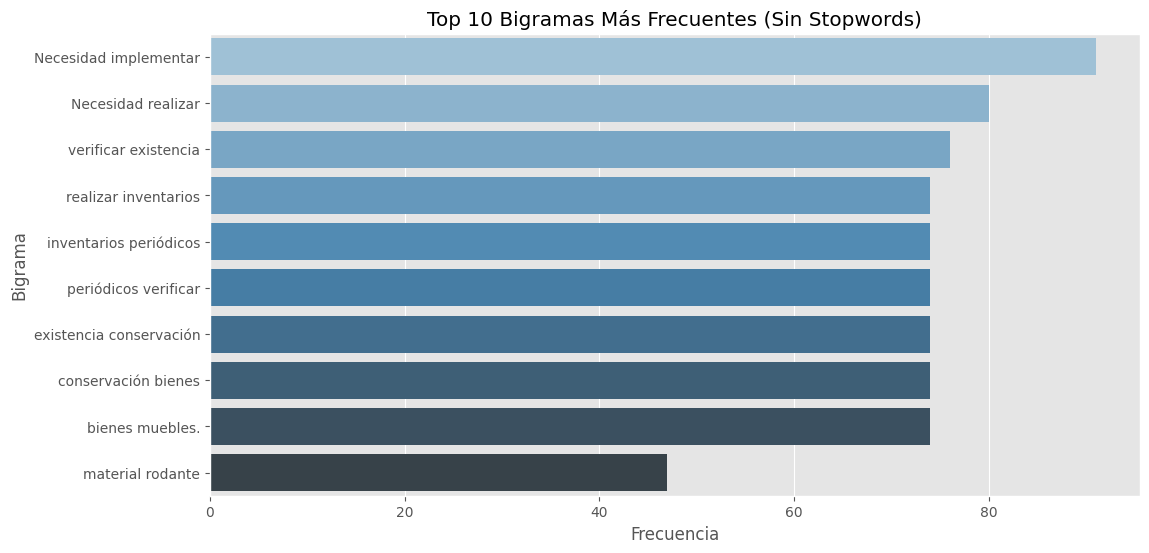

<ipython-input-14-84116c4f189d>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_trigramas_filtrados, x='Frecuencia', y='Trigrama', palette='Greens_d')


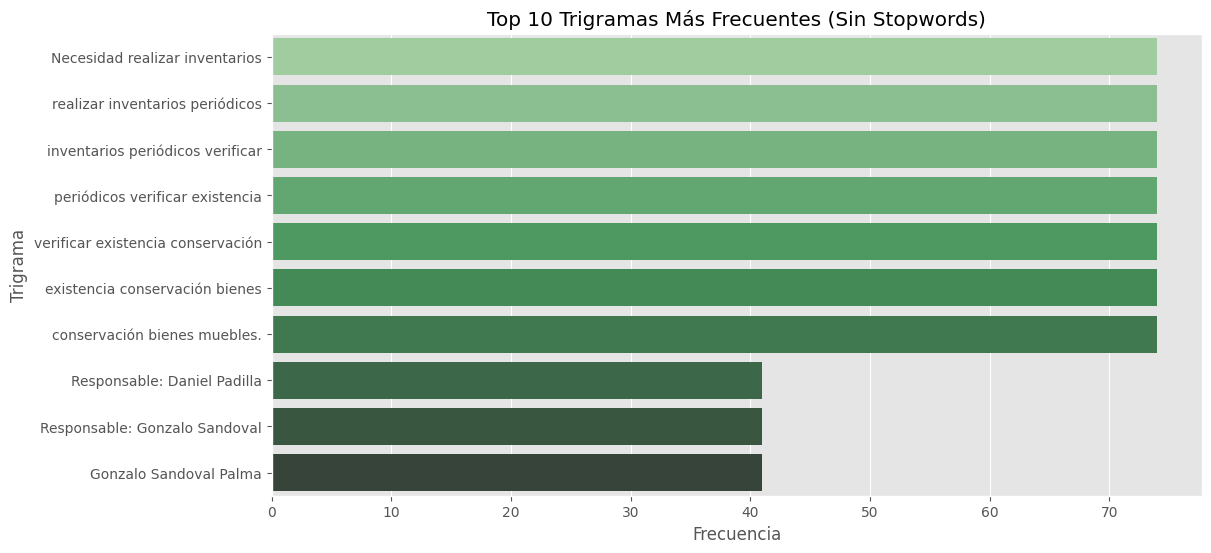

In [14]:
from nltk.corpus import stopwords

# ======== CONFIGURACIÓN DE STOPWORDS ========
stop_words = set(stopwords.words('spanish'))

# Modificamos la función de generación de n-grams para eliminar stopwords
def generar_ngrams_filtrado(texto, n):
    tokens = [palabra for palabra in texto.split() if palabra not in stop_words]
    return list(ngrams(tokens, n))

# Creamos nuevas listas para bigramas y trigramas sin stopwords
bigramas_filtrados = []
trigramas_filtrados = []

for texto in datos_relevantes['Texto_Concatenado']:
    bigramas_filtrados.extend(generar_ngrams_filtrado(texto, 2))  # Bigramas
    trigramas_filtrados.extend(generar_ngrams_filtrado(texto, 3))  # Trigramas

# ======== CÁLCULO DE FRECUENCIA ========
conteo_bigramas_filtrados = Counter(bigramas_filtrados).most_common(10)
conteo_trigramas_filtrados = Counter(trigramas_filtrados).most_common(10)

# Convertimos los resultados a DataFrames
df_bigramas_filtrados = pd.DataFrame(conteo_bigramas_filtrados, columns=['Bigrama', 'Frecuencia'])
df_bigramas_filtrados['Bigrama'] = df_bigramas_filtrados['Bigrama'].apply(lambda x: ' '.join(x))

df_trigramas_filtrados = pd.DataFrame(conteo_trigramas_filtrados, columns=['Trigrama', 'Frecuencia'])
df_trigramas_filtrados['Trigrama'] = df_trigramas_filtrados['Trigrama'].apply(lambda x: ' '.join(x))

# ======== VISUALIZACIÓN ========
# Bigramas Filtrados
plt.figure(figsize=(12, 6))
sns.barplot(data=df_bigramas_filtrados, x='Frecuencia', y='Bigrama', palette='Blues_d')
plt.title("Top 10 Bigramas Más Frecuentes (Sin Stopwords)")
plt.xlabel("Frecuencia")
plt.ylabel("Bigrama")
plt.show()

# Trigramas Filtrados
plt.figure(figsize=(12, 6))
sns.barplot(data=df_trigramas_filtrados, x='Frecuencia', y='Trigrama', palette='Greens_d')
plt.title("Top 10 Trigramas Más Frecuentes (Sin Stopwords)")
plt.xlabel("Frecuencia")
plt.ylabel("Trigrama")
plt.show()


**Conclusiones de los Bigramas:**

Acciones Prioritarias:

Bigramas como "necesidad implementar", "necesidad realizar" y "verificar existencia" sugieren que las recomendaciones están orientadas hacia la implementación de controles y procesos esenciales.
El enfoque en acciones concretas indica que las auditorías no solo identifican problemas, sino que también proponen soluciones claras.
Revisión de Inventarios:

La presencia de bigramas como "realizar inventarios" y "inventarios periódicos" sugiere que la gestión de inventarios es una prioridad constante en los hallazgos.
Esto implica que existe un esfuerzo por garantizar la trazabilidad y control de los activos físicos, lo cual puede ser crítico para los procesos operativos.
Enfoque en Bienes:

La relevancia de bigramas como "conservación bienes" y "bienes muebles" muestra que el control sobre activos físicos es un punto recurrente en los comentarios.

**Conclusiones de los Trigramas:**

Procesos Repetitivos y Controlados:

Los trigramas como "realizar inventarios periódicos" y "inventarios periódicos verificar" refuerzan la idea de procesos repetitivos orientados al mantenimiento y control.
Esto resalta la importancia de la frecuencia de auditoría y monitoreo en los procedimientos evaluados.

Asignación de Responsabilidades:

La mención de nombres específicos como "Responsable: Daniel Padilla" o "Gonzalo Sandoval Palma" sugiere un énfasis en la trazabilidad y asignación clara de roles dentro de la organización.
Esto refleja la importancia de identificar responsables en la ejecución de acciones correctivas o de cumplimiento.

Conservación y Control de Bienes:

La alta frecuencia de trigramas relacionados con "conservación de bienes" y "verificar existencia conservación" indica que existe un énfasis significativo en el mantenimiento y la gestión de activos como parte del proceso de auditoría.

**Visualización de Palabras con Word Cloud**

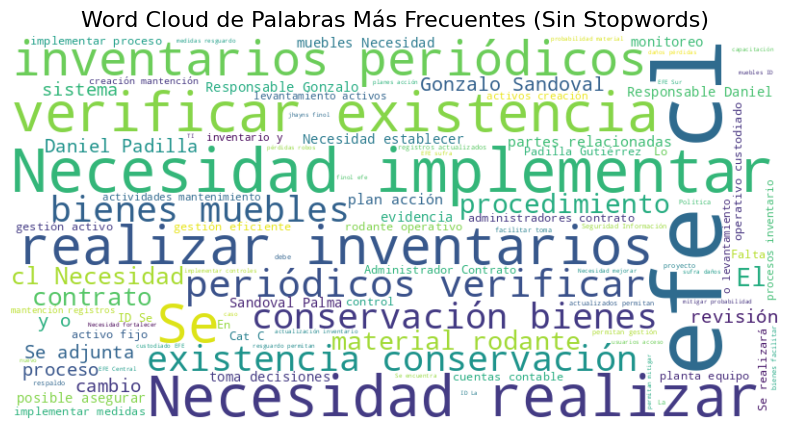

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ======== CONCATENACIÓN DE TEXTOS SIN STOPWORDS ========
# Filtramos las palabras eliminando stopwords
palabras_filtradas = [
    palabra for texto in datos_relevantes['Texto_Concatenado']
    for palabra in texto.split()
    if palabra not in stop_words
]

# Unimos todas las palabras en un solo string para el Word Cloud
texto_filtrado = ' '.join(palabras_filtradas)

# ======== GENERACIÓN DEL WORD CLOUD ========
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100  # Limitar a las 100 palabras más frecuentes
).generate(texto_filtrado)

# ======== VISUALIZACIÓN ========
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Oculta los ejes
plt.title("Word Cloud de Palabras Más Frecuentes (Sin Stopwords)", fontsize=16)
plt.show()


1. Términos Relevantes Identificados
Acciones y Verificación:

Las palabras "verificar", "realizar", "implementar" aparecen destacadas, lo que indica que una parte significativa de los hallazgos se enfoca en acciones específicas relacionadas con la gestión y control.
Gestión de Inventarios:

La presencia prominente de "inventarios", "periódicos", "existencia" muestra un fuerte enfoque en el control periódico de activos e inventarios.
Conservación de Bienes:

Términos como "conservación", "bienes", "muebles" sugieren que el mantenimiento y control de activos físicos es un tema prioritario en los hallazgos.

2. Asignación de Responsabilidades
Nombres Propios:
La presencia de nombres como "Daniel Padilla" y "Gonzalo Sandoval" sugiere que la trazabilidad y la asignación clara de responsabilidades son un elemento relevante dentro de los procesos evaluados.

3. Temas Clave y Prioridades
"Necesidad de":

El término "necesidad" aparece repetidamente en combinación con otros términos de acción, lo que indica que los hallazgos se presentan como recomendaciones para acciones necesarias (como implementar procesos o realizar inventarios).
Mantenimiento y Control:

El énfasis en términos relacionados con "conservación", "existencia" y "verificación" sugiere que hay un interés en monitorear la condición de los activos y asegurar su adecuado mantenimiento.


**Conclusión General**

Este Word Cloud refuerza los hallazgos previos del análisis de n-grams:

Foco en la implementación y mantenimiento de procesos de control.
Control periódico de inventarios y activos.
Asignación de responsabilidades claras en el proceso.

**Conclusiones del Analisis exploratorio**

Principales Hallazgos del EDA

Patrones de Acción y Control:

Se destacan términos como "implementar", "realizar", "verificar", lo que sugiere un foco en la acción correctiva y la mejora continua.
Los hallazgos no se limitan a identificar problemas, sino que se acompañan de recomendaciones específicas para mejorar los procesos.

Gestión de Inventarios y Conservación de Bienes:

La alta frecuencia de términos como "inventarios", "periódicos", "existencia" refleja un interés continuo en el control de activos físicos.
La conservación y trazabilidad de bienes también emergen como temas recurrentes, indicando la relevancia del monitoreo constante en la operación diaria.

Asignación Clara de Responsabilidades:

La mención de nombres propios, como Daniel Padilla o Gonzalo Sandoval, sugiere una trazabilidad sólida en los procesos de auditoría.
La asignación de responsables es crucial para asegurar el cumplimiento y la ejecución efectiva de las acciones correctivas.

Necesidad y Mejora Continua:

La repetición del término "necesidad" junto a acciones como "implementar" y "realizar" indica que los hallazgos se enfocan en acciones urgentes o recomendadas.
Esto evidencia un interés por optimizar procesos existentes y mantener estándares de control altos.

3. Valoración del Uso de Técnicas de NLP

Eliminación de Stopwords:

El filtro de palabras comunes ha permitido identificar los términos más relevantes y enfocar el análisis en los conceptos clave, eliminando ruido innecesario.

Visualización Efectiva con Word Cloud y N-grams:

Las visualizaciones, como bigrams, trigrams y el Word Cloud, refuerzan la relevancia de las acciones concretas y los procesos de control repetitivo.

Lematización sobre Stemming:

La elección de lematización ha resultado en un análisis más preciso, permitiendo preservar el contexto semántico sin alterar las palabras originales.

4. Conclusiones Relevantes del Proyecto

Procesos controlados y monitoreo constante: El análisis muestra que la auditoría no es un proceso esporádico, sino una actividad continua, con un enfoque en la ejecución repetitiva de controles y verificación.

Trazabilidad y responsabilidad efectiva: La asignación clara de roles y la documentación detallada aseguran responsabilidad y transparencia en las acciones recomendadas.

Valor tangible para la gestión de riesgos: El uso de NLP para automatizar la revisión de hallazgos reduce la carga manual y mejora la toma de decisiones, generando valor para las organizaciones.


# **Preprocesamiento del Texto**

**Análisis Sintáctico**

*Parsing:*

Construir árboles sintácticos para las oraciones en el corpus.

*Dependencia Sintáctica:*

Análisis de dependencias para entender las relaciones gramaticales entre palabras.

**Análisis Pragmático**

*Análisis de Sentimientos:*

Determinar el tono y las emociones expresadas en el texto.

*Detección de Intenciones:*

Identificar las intenciones detrás de las expresiones del texto.

Resultados del Análisis de Sentimientos:
                                   Texto_Concatenado Sentimiento
0  Necesidad de formalizar la prestación de servi...     NEUTRAL
1  Necesidad de establecer controles para identif...     NEUTRAL
2  Establecer un control que permita la designaci...    POSITIVE
3  No es posible asegurar que se realicen capacit...    NEGATIVE
4  Necesidad Formalizar el control de verificació...     NEUTRAL
Resultados de la Detección de Intenciones:
                                   Texto_Concatenado    Intencion
0  Necesidad de formalizar la prestación de servi...  Descriptivo
1  Necesidad de establecer controles para identif...  Descriptivo
2  Establecer un control que permita la designaci...  Advertencia
3  No es posible asegurar que se realicen capacit...  Advertencia
4  Necesidad Formalizar el control de verificació...  Advertencia


<ipython-input-24-e4685f5fa249>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentimientos_freq.index, y=sentimientos_freq.values, palette='coolwarm')


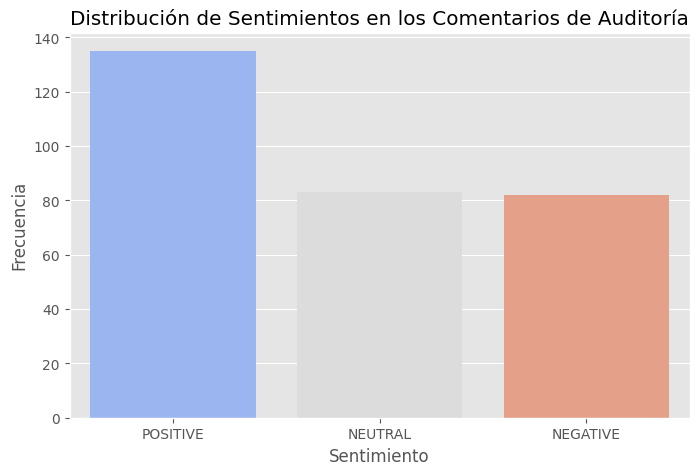

<ipython-input-24-e4685f5fa249>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=intenciones_freq.index, y=intenciones_freq.values, palette='muted')


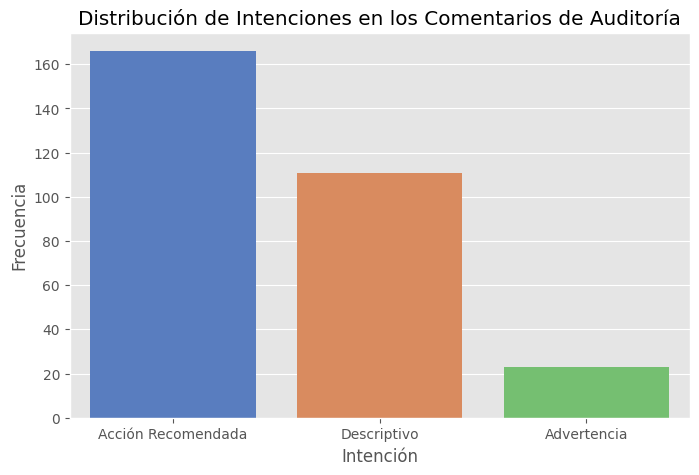

In [24]:
# Instalar la librería transformers si no está instalada
!pip install transformers

from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el modelo de análisis de sentimientos
sentimiento = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Función para dividir textos en fragmentos pequeños (máximo 100 palabras por fragmento)
def fragmentar_texto(texto, max_palabras=100):
    palabras = texto.split()
    for i in range(0, len(palabras), max_palabras):
        yield ' '.join(palabras[i:i + max_palabras])

# Función para analizar el sentimiento de cada fragmento y consolidar el resultado
def analizar_sentimiento(texto):
    fragmentos = list(fragmentar_texto(texto))
    resultados = [sentimiento(fragmento)[0]['label'] for fragmento in fragmentos]

    # Mapeo de estrellas a valores numéricos
    mapeo = {
        '1 star': -1, '2 stars': -1,  # Negativo
        '3 stars': 0,                 # Neutral
        '4 stars': 1, '5 stars': 1    # Positivo
    }

    # Convertir las etiquetas a valores numéricos y calcular el promedio
    promedio = sum(mapeo[res] for res in resultados) / len(resultados)

    # Convertir el promedio de nuevo a una etiqueta de sentimiento
    if promedio > 0.33:
        return 'POSITIVE'
    elif promedio < -0.33:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

# Aplicar el análisis de sentimientos a los textos concatenados
datos_relevantes['Sentimiento'] = datos_relevantes['Texto_Concatenado'].apply(analizar_sentimiento)

# Mostrar los primeros resultados
print("Resultados del Análisis de Sentimientos:")
print(datos_relevantes[['Texto_Concatenado', 'Sentimiento']].head())

# Función para detectar intenciones a partir de palabras clave
def detectar_intencion(texto):
    if any(palabra in texto.lower() for palabra in ['implementar', 'realizar', 'mitigar']):
        return 'Acción Recomendada'
    elif any(palabra in texto.lower() for palabra in ['advertencia', 'riesgo', 'corregir']):
        return 'Advertencia'
    elif 'sugerir' in texto.lower() or 'recomendar' in texto.lower():
        return 'Sugerencia'
    else:
        return 'Descriptivo'

# Aplicar la detección de intenciones a los textos concatenados
datos_relevantes['Intencion'] = datos_relevantes['Texto_Concatenado'].apply(detectar_intencion)

# Mostrar los primeros resultados de la detección de intenciones
print("Resultados de la Detección de Intenciones:")
print(datos_relevantes[['Texto_Concatenado', 'Intencion']].head())

# Visualización de Sentimientos
sentimientos_freq = datos_relevantes['Sentimiento'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=sentimientos_freq.index, y=sentimientos_freq.values, palette='coolwarm')
plt.title("Distribución de Sentimientos en los Comentarios de Auditoría")
plt.xlabel("Sentimiento")
plt.ylabel("Frecuencia")
plt.show()

# Visualización de Intenciones
intenciones_freq = datos_relevantes['Intencion'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=intenciones_freq.index, y=intenciones_freq.values, palette='muted')
plt.title("Distribución de Intenciones en los Comentarios de Auditoría")
plt.xlabel("Intención")
plt.ylabel("Frecuencia")
plt.show()


Conclusiones del Análisis de Sentimientos e Intenciones
Análisis de Sentimientos:
Prevalencia de Sentimientos Positivos:

El gráfico muestra que la mayor parte de los comentarios tiene una connotación positiva, con más de 120 registros en esta categoría. Esto sugiere que, en general, las auditorías reflejan una actitud favorable hacia los procesos o una percepción optimista de las acciones realizadas.
Proporción de Sentimientos Neutrales y Negativos:

Los comentarios neutrales y negativos tienen una presencia equilibrada, ambos con una frecuencia aproximada de 80 registros cada uno. Esto indica que, aunque existen áreas de mejora o críticas constructivas, también hay muchos comentarios descriptivos o que no generan una reacción emocional fuerte.
Balance General:

La distribución de los sentimientos es relativamente equilibrada, con una tendencia a lo positivo, lo que podría ser indicativo de una buena implementación de controles o una aceptación general de los procesos de auditoría. Sin embargo, la presencia de comentarios negativos también resalta oportunidades de mejora.


Conclusiones del Análisis de Sentimientos e Intenciones
Análisis de Sentimientos:
Prevalencia de Sentimientos Positivos:

El gráfico muestra que la mayor parte de los comentarios tiene una connotación positiva, con más de 120 registros en esta categoría. Esto sugiere que, en general, las auditorías reflejan una actitud favorable hacia los procesos o una percepción optimista de las acciones realizadas.
Proporción de Sentimientos Neutrales y Negativos:

Los comentarios neutrales y negativos tienen una presencia equilibrada, ambos con una frecuencia aproximada de 80 registros cada uno. Esto indica que, aunque existen áreas de mejora o críticas constructivas, también hay muchos comentarios descriptivos o que no generan una reacción emocional fuerte.
Balance General:

La distribución de los sentimientos es relativamente equilibrada, con una tendencia a lo positivo, lo que podría ser indicativo de una buena implementación de controles o una aceptación general de los procesos de auditoría. Sin embargo, la presencia de comentarios negativos también resalta oportunidades de mejora.
Análisis de Intenciones:
Acción Recomendada como la Intención Dominante:

Más de 160 comentarios se clasifican bajo la categoría "Acción Recomendada", lo que revela un enfoque claro en la necesidad de implementar o mejorar procesos. Esto indica que gran parte de los comentarios de auditoría no se limitan a observaciones, sino que buscan generar cambios específicos y mejorar la gestión.
Descripciones Informativas:

La intención descriptiva también es relevante, con más de 100 registros. Estos comentarios probablemente detallan situaciones, procesos o estados sin hacer énfasis en recomendaciones directas. Esto sugiere que las auditorías incluyen tanto análisis proactivos como descripciones de estado.
Advertencias como una Minoría:

Las advertencias son la categoría menos frecuente, con menos de 50 registros. Esto podría reflejar que los riesgos críticos o situaciones de alarma son poco comunes, o bien que la gestión preventiva ha reducido la necesidad de advertencias severas.

Interpretación Global:
El análisis muestra una auditoría orientada hacia la acción y la mejora continua, con un enfoque proactivo en la implementación de controles y mitigación de riesgos. La distribución de sentimientos refleja una actitud generalmente positiva hacia los procesos, aunque la presencia de comentarios neutrales y negativos indica que también se reconocen desafíos y oportunidades de mejora.

La menor frecuencia de advertencias puede interpretarse como un indicador positivo de que los riesgos más severos han sido gestionados eficazmente. Sin embargo, estos hallazgos también sugieren la necesidad de continuar monitoreando para evitar complacencia y asegurar la identificación temprana de riesgos emergentes.

**Codificación de texto a vectores**

Bag of word

Tf-IDF

Word Embendings


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Matriz Tf-IDF (Primeras Filas):
       2024        30    acción  actividades  activo  activos  actualización  \
0  0.000000  0.000000  0.104101          0.0     0.0      0.0            0.0   
1  0.084349  0.124248  0.107617          0.0     0.0      0.0            0.0   
2  0.052895  0.233746  0.067486          0.0     0.0      0.0            0.0   
3  0.050570  0.223472  0.064520          0.0     0.0      0.0            0.0   
4  0.054195  0.399149  0.069144          0.0     0.0      0.0            0.0   

    adjunta  asegurar  auditoría  ...       ser  servicio  servicios  \
0  0.000000  0.000000   0.121252  ...  0.000000       0.0    0.76234   
1  0.000000  0.000000   0.000000  ...  0.120129       0.0    0.00000   
2  0.359475  0.000000   0.000000  ...  0.075332       0.0    0.00000   
3  0.343675  0.134493   0.000000  ...  0.072021       0.0    0.00000   
4  0.368308  0.000000   0.000000  ...  0.077183       0.0    0.00000   

    sistema  trabajo  usuarios  verificación  verifica

<ipython-input-26-0b59c3d86638>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=suma_tfidf.values, y=suma_tfidf.index, palette='viridis')


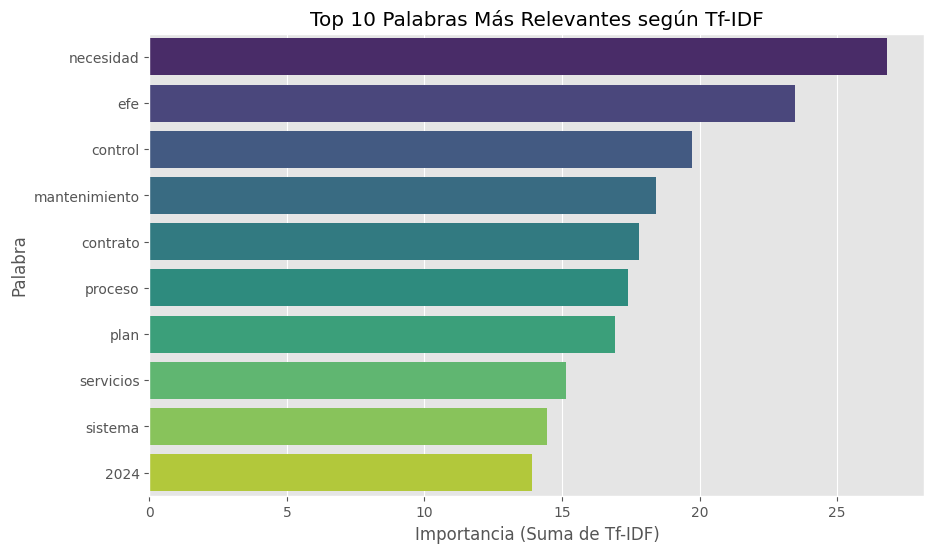

In [26]:
# Instalamos las librerías necesarias
!pip install scikit-learn nltk

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import pandas as pd

# Descargar stopwords en español desde NLTK
nltk.download('stopwords')
stop_words_es = stopwords.words('spanish')

# Inicializar el vectorizador Tf-IDF usando las stopwords en español
tfidf_vectorizer = TfidfVectorizer(
    max_features=100,  # Limitar a las 100 palabras más relevantes
    stop_words=stop_words_es,  # Aplicar stopwords en español
    ngram_range=(1, 2)  # Incluir unigramas y bigramas
)

# Aplicar el vectorizador a los textos concatenados
tfidf_matriz = tfidf_vectorizer.fit_transform(datos_relevantes['Texto_Concatenado'])

# Convertir la matriz Tf-IDF en un DataFrame para visualizar los resultados
tfidf_df = pd.DataFrame(
    tfidf_matriz.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)

# Mostrar las primeras filas del DataFrame con los valores Tf-IDF
print("Matriz Tf-IDF (Primeras Filas):")
print(tfidf_df.head())

# Visualización de las palabras más relevantes según Tf-IDF
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la suma de los valores Tf-IDF por palabra
suma_tfidf = tfidf_df.sum(axis=0).sort_values(ascending=False).head(10)

# Graficar las 10 palabras más relevantes
plt.figure(figsize=(10, 6))
sns.barplot(x=suma_tfidf.values, y=suma_tfidf.index, palette='viridis')
plt.title("Top 10 Palabras Más Relevantes según Tf-IDF")
plt.xlabel("Importancia (Suma de Tf-IDF)")
plt.ylabel("Palabra")
plt.show()


Conclusiones del Análisis con Tf-IDF
Palabras más relevantes en los comentarios:

"necesidad", "control", "mantenimiento" y "contrato" son las palabras con mayor peso. Esto sugiere que los comentarios de auditoría se enfocan en identificar necesidades específicas y la implementación de controles y mantenimiento.
La importancia del término "proceso" resalta la preocupación por mantener un flujo estructurado de actividades.
Palabras como "servicios" y "sistema" sugieren un enfoque en garantizar que los sistemas y servicios se mantengan operativos.
Palabras menos informativas (anomalías):

Términos como "2024" y "efe" podrían haberse incluido como ruido. Esto sugiere que sería útil revisar el texto para identificar posibles errores o palabras que no aportan valor significativo al análisis.
Matriz Tf-IDF:

Cada fila representa un comentario de auditoría, y cada columna contiene el valor Tf-IDF correspondiente a una palabra o bigrama. Los valores más altos indican la relevancia específica de esos términos en el contexto del comentario.
En los primeros registros, se observa que términos como "verificar existencia" y "servicios" tienen un peso relevante en varios comentarios, lo que confirma la importancia de la verificación y control dentro del proceso de auditoría.
Importancia de los resultados:

La prominencia de términos como "control", "proceso" y "plan" refuerza la necesidad de establecer controles claros y procesos bien definidos dentro de la organización. Este hallazgo sugiere que la implementación de auditorías se enfoca en la trazabilidad y la mejora continua.
Los resultados obtenidos también muestran que hay un énfasis en planes de mantenimiento y control de servicios, lo cual puede reflejar preocupaciones operativas o contractuales dentro de los hallazgos de auditoría.
Acción recomendada:

Se recomienda revisar palabras con relevancia inesperada (como "2024" y "efe") para decidir si deben ser eliminadas del análisis mediante una limpieza más profunda.
El uso de Tf-IDF ha permitido identificar las palabras más relevantes para cada comentario, lo que podría ser útil en etapas futuras, como la generación de alertas automáticas basadas en la identificación temprana de riesgos.
Estos resultados refuerzan los hallazgos previos del análisis pragmático y n-grams, mostrando un claro enfoque en acciones correctivas, controles y procesos operativos dentro de los comentarios de auditoría. Esto aporta valor al proyecto al proporcionar información útil para mejorar la gestión de auditorías y riesgos.

#**Feature Selection**

**Selección de variable objetivo y variables independientes**

**Clasificación de Texto**

X (Entrada): Texto del documento (puede ser una oración, párrafo, o artículo completo).

Y (Salida): Etiqueta de la categoría del texto (por ejemplo, "positivo" o "negativo" para análisis de sentimientos, o categorías como "deportes", "política", "tecnología" para clasificación de noticias).

**Análisis de Sentimientos**

X (Entrada): Texto del documento.

Y (Salida): Sentimiento asociado (por ejemplo, "positivo", "negativo" o "neutral").

**Reconocimiento de Entidades Nombradas (NER)**

X (Entrada): Texto del documento.

Y (Salida): Entidades reconocidas y sus categorías (por ejemplo, "PERSONA", "ORGANIZACIÓN", "LUGAR").

**Traducción Automática**

X (Entrada): Texto en el idioma de origen.

Y (Salida): Texto traducido al idioma de destino.

**Resumen de Texto**

X (Entrada): Texto completo del documento.

Y (Salida): Resumen del documento.

**Generación de Texto**

X (Entrada): Prompt o inicio de una frase o párrafo.

Y (Salida): Texto generado continuando el prompt.

**Modelos de Lenguaje (Language Modeling)**

X (Entrada): Una secuencia de palabras o caracteres.

Y (Salida): La siguiente palabra o carácter en la secuencia.

# **Modelos**

**Librerias necesarias para implementar los modelos**

**División de datos en conjuntos de entrenamiento y prueba**

**Predicción con conjunto de prueba**

**Evaluación del rendimiento del modelo**

**Conclusión sobre el modelado y las metricas**

#**Optimización de modelos**

**Conclusión sobre la optimización**

# **Conclusiones Finales**